In [ ]:
## Loading file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#Connecting Google Drive with the Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'  ##Paste the filepath to NETFLIX MOVIES AND TV SHOWS CLUSTERING dataset you downloaded previously.
data=pd.read_csv(file_path)

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data.shape

(7787, 12)

In [ ]:
data.isnull

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,True,False,False,False,False,False,False
7785,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
df_dropped_cols = data.dropna(axis=1)

In [ ]:
df_dropped_cols.shape

(7787, 7)

In [ ]:
df_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   release_year  7787 non-null   int64 
 4   duration      7787 non-null   object
 5   listed_in     7787 non-null   object
 6   description   7787 non-null   object
dtypes: int64(1), object(6)
memory usage: 426.0+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df_subset = data.dropna(subset=['country','director', 'cast', 'rating', 'date_added'])

In [ ]:
df_subset.shape

(4808, 12)

In [ ]:
df_subset.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
# Fill missing values in categorical columns
data['country'] = data['country'].fillna('Unknown')
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Unknown')
data['rating'] = data['rating'].fillna('Not Rated')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_missing
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,True
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,False
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",False
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",False
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,False


In [ ]:
# Extract and simplify features
# Extract year and month from date_added
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month


In [ ]:
# Simplify genres into broad categories
data['broad_genre'] = data['listed_in'].str.split(',').str[0]


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_missing,year_added,month_added,broad_genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,True,2020.0,8.0,International TV Shows
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,False,2016.0,12.0,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",False,2018.0,12.0,Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",False,2017.0,11.0,Action & Adventure
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,False,2020.0,1.0,Dramas


In [ ]:
# Create new columns for additional analysis
# Calculate total cast size
data['cast_size'] = data['cast'].apply(lambda x: len(x.split(', ')) if x != 'Unknown' else 0)

# Indicate if a title has a director or not
data['is_directed'] = data['director'].apply(lambda x: 0 if x == 'Unknown' else 1)


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_missing,year_added,month_added,broad_genre,cast_size,is_directed
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,True,2020.0,8.0,International TV Shows,11,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,False,2016.0,12.0,Dramas,6,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",False,2018.0,12.0,Horror Movies,9,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",False,2017.0,11.0,Action & Adventure,9,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,False,2020.0,1.0,Dramas,12,1


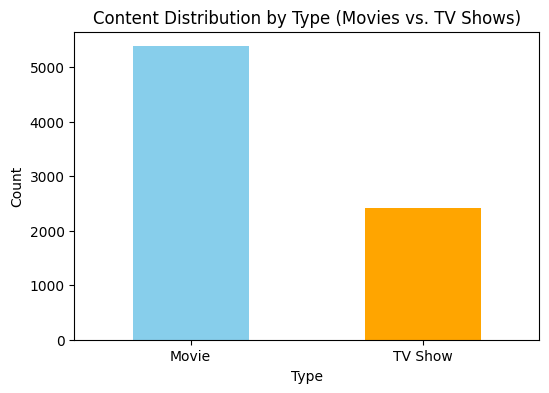

In [ ]:
# Visualization: Content distribution by type
plt.figure(figsize=(6, 4))
data['type'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Content Distribution by Type (Movies vs. TV Shows)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

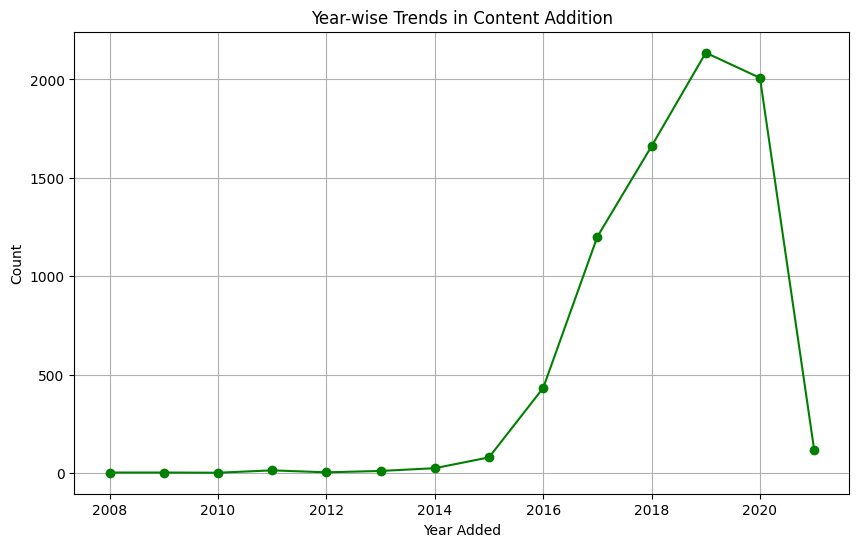

In [ ]:
# Visualization: Year-wise trends in content addition
plt.figure(figsize=(10, 6))
data['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Year-wise Trends in Content Addition')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.grid(True)
plt.show()

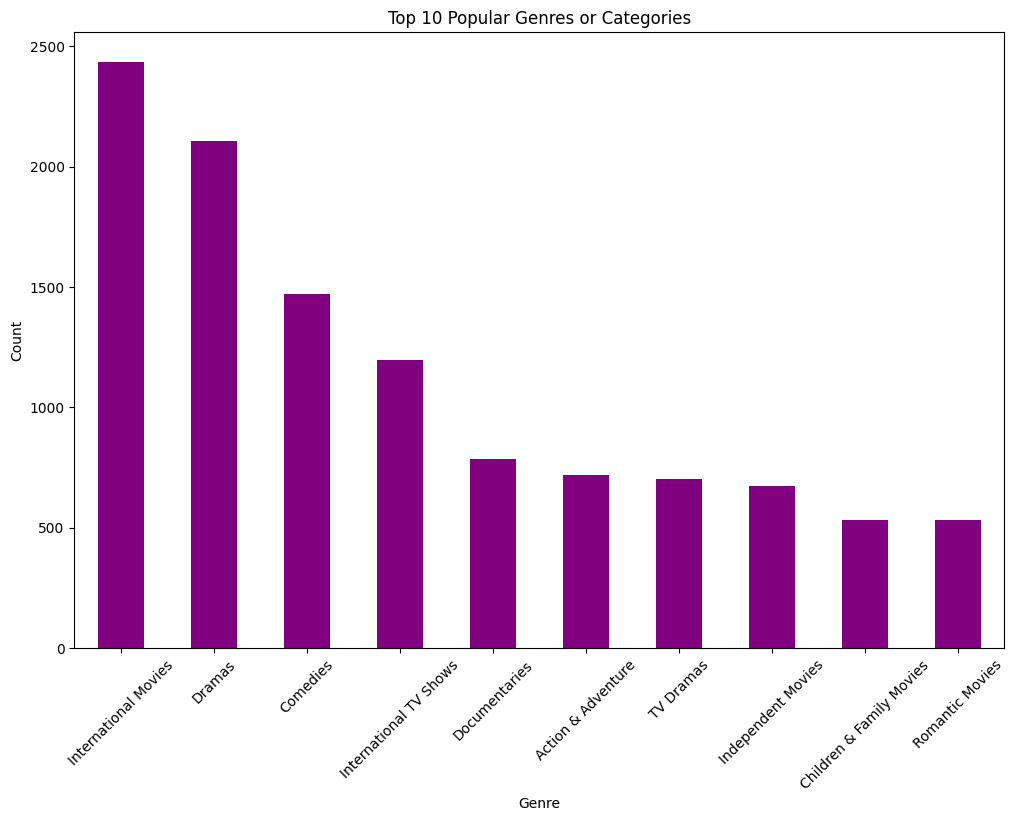

In [ ]:
# Visualization: Popular genres or categories
genres = data['listed_in'].str.split(', ', expand=True).stack().value_counts()
plt.figure(figsize=(12, 8))
genres.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Popular Genres or Categories')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Clustering Similar Content
# Preprocess text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['description'].fillna(''))

In [ ]:
# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
data['cluster'] = kmeans.labels_

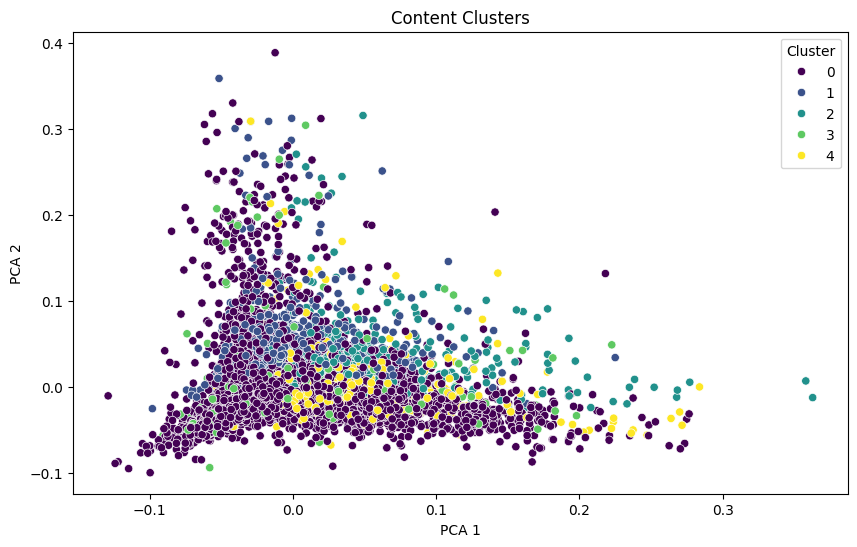

In [ ]:
# Visualize Clusters with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())
data['pca_x'] = reduced_data[:, 0]
data['pca_y'] = reduced_data[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=data, palette='viridis', legend='full')
plt.title('Content Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

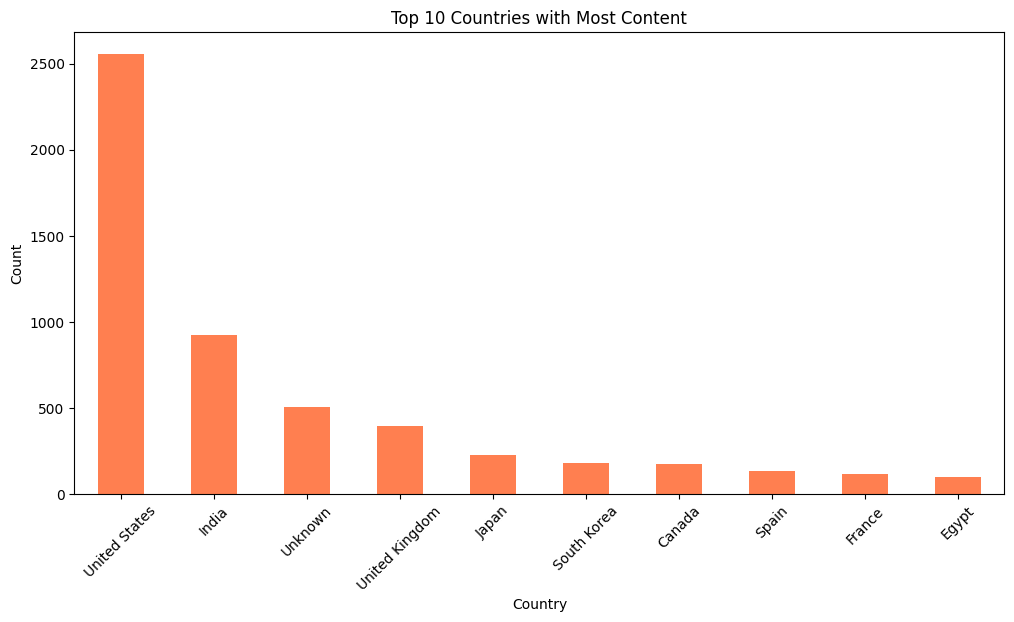

In [ ]:
# Visualization: Content Distribution by Country
plt.figure(figsize=(12, 6))
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='coral')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

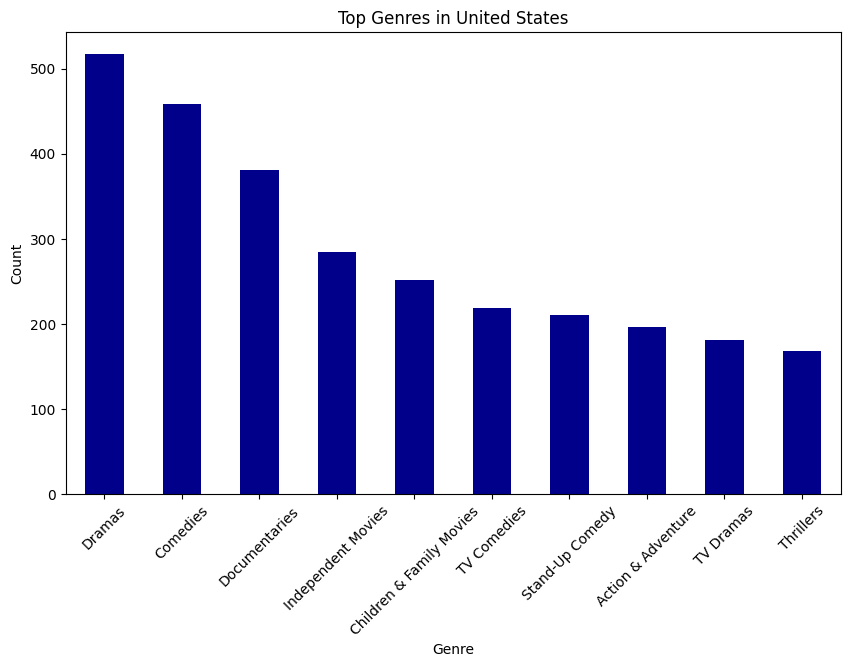

In [ ]:
# Popular genres in the top country
top_country = top_countries.index[0]
top_country_genres = data[data['country'] == top_country]['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(10, 6))
top_country_genres.plot(kind='bar', color='darkblue')
plt.title(f'Top Genres in {top_country}')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

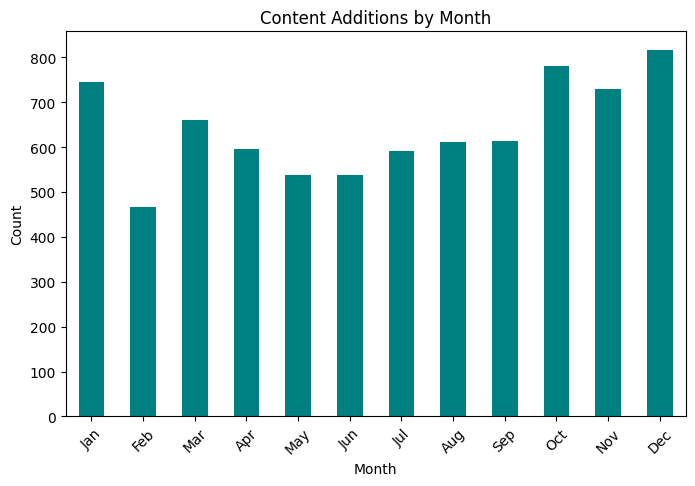

In [ ]:
# Monthly trends
monthly_trends = data.groupby('month_added').size()

plt.figure(figsize=(8, 5))
monthly_trends.plot(kind='bar', color='teal')
plt.title('Content Additions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

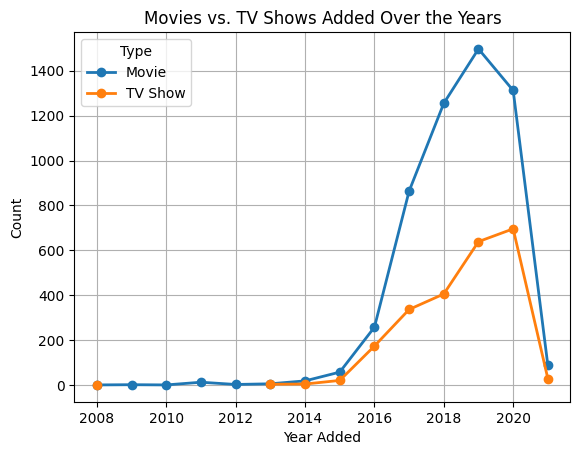

In [ ]:
# Year-wise distribution of Movies vs. TV Shows
yearly_type_trend = data.groupby(['year_added', 'type']).size().unstack()

plt.figure(figsize=(12, 6))
yearly_type_trend.plot(kind='line', marker='o', linewidth=2)
plt.title('Movies vs. TV Shows Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Type')
plt.show()


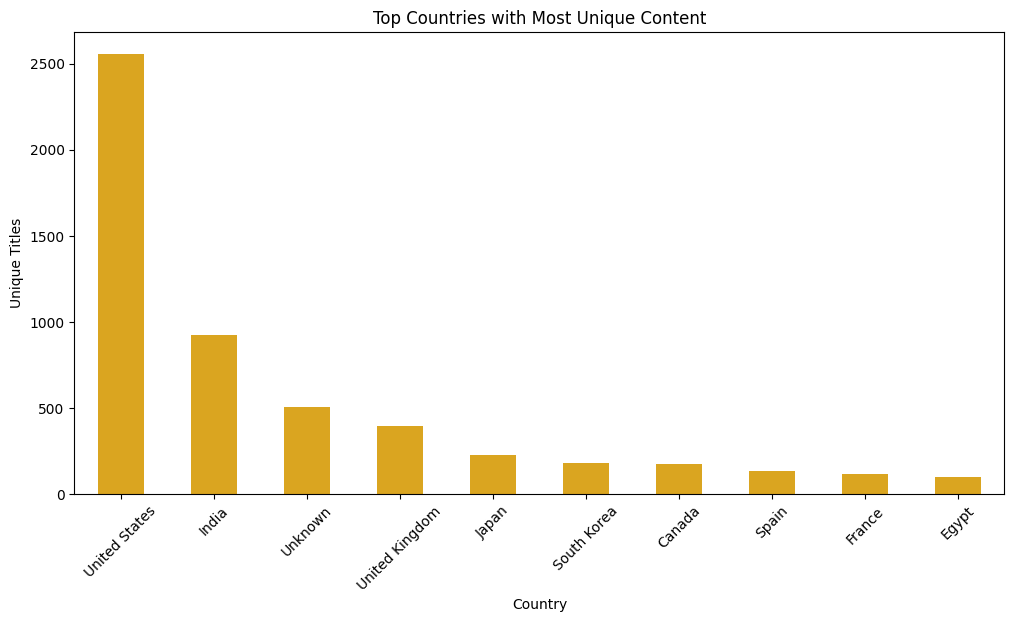

In [ ]:
# Unique content by country
unique_content = data.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
unique_content.plot(kind='bar', color='goldenrod')
plt.title('Top Countries with Most Unique Content')
plt.xlabel('Country')
plt.ylabel('Unique Titles')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# data.to_csv('netflix_data_cleaned.csv', index=False)